In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

In [3]:
path = "Data_ccr/par_set1/alpha/T=0.85/"

In [4]:
E = np.arange(0.2,30.2,0.2)
print(E)

[ 0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8
  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6
  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4
  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.  11.2
 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8 14.
 14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.8 16.  16.2 16.4 16.6 16.8
 17.  17.2 17.4 17.6 17.8 18.  18.2 18.4 18.6 18.8 19.  19.2 19.4 19.6
 19.8 20.  20.2 20.4 20.6 20.8 21.  21.2 21.4 21.6 21.8 22.  22.2 22.4
 22.6 22.8 23.  23.2 23.4 23.6 23.8 24.  24.2 24.4 24.6 24.8 25.  25.2
 25.4 25.6 25.8 26.  26.2 26.4 26.6 26.8 27.  27.2 27.4 27.6 27.8 28.
 28.2 28.4 28.6 28.8 29.  29.2 29.4 29.6 29.8 30. ]


In [6]:
# Alpha_m1_1 = np.loadtxt(path + "A_m1_16.dat")
# Alpha_m1_2 = np.loadtxt(path + "A_m1_10.dat")
# Alpha_m1_3 = np.loadtxt(path + "A_m1_08.dat")
# Alpha_m1_4 = np.loadtxt(path + "A_m1_04.dat")
# Alpha_m1_5 = np.loadtxt(path + "A_m1_02.dat")



In [8]:
# plt.plot(E,Alpha_m1_1,label="$N_{skip} = 16$")
# plt.scatter(E,Alpha_m1_1)
# plt.plot(E,Alpha_m1_2,label="$N_{skip} = 10$")
# plt.scatter(E,Alpha_m1_2)
# plt.plot(E,Alpha_m1_3,label="$N_{skip} = 8$")
# plt.scatter(E,Alpha_m1_3)
# plt.plot(E,Alpha_m1_4,label="$N_{skip} = 4$")
# plt.scatter(E,Alpha_m1_4)
# plt.plot(E,Alpha_m1_5,label="$N_{skip} = 2$")
# plt.scatter(E,Alpha_m1_5)

# # plt.scatter(E_dn_py,alpha_dn, c = "RoyalBlue", label="Down")
# plt.title("alpha vs V , $N_{meas} = 2048*16$, $r_0 = 3.5$  ")
# plt.legend()

# plt.grid(b=True,which='major', axis='both')
# plt.xlabel("Electric Field (E)")
# plt.ylabel(r'$\alpha$')
# plt.savefig(path+"alpvf.pdf")
# plt.show()
    

In [9]:
# plt.plot(E_up1_m2,Alpha_up1_m2,label="$N_{skip} = 16$")
# plt.scatter(E_up1_m2,Alpha_up1_m2)
# plt.plot(E_up2_m2,Alpha_up2_m2,label="$N_{skip} = 8$")
# plt.scatter(E_up2_m2,Alpha_up2_m2)
# # plt.scatter(E_dn_py,alpha_dn, c = "RoyalBlue", label="Down")
# plt.title("alpha vs V , $N_{meas} = 1024*16$ , $64*64$, $r_0 = 3.5$  ")
# plt.legend()
# # plt.savefig(path+"alpvf.pdf")
# plt.grid(b=True,which='major', axis='both')
# plt.xlabel("Electric Field (E)")
# plt.ylabel(r'$\alpha$')
# plt.show()
    

In [10]:
sigma = 0.5
mu = 1.6
Ntot = 2048*16
B = sigma * np.random.randn(Ntot) + mu
C = np.random.poisson(5, Ntot)
D = np.random.random(Ntot)

# print(B)
fs = 1000.0
beta = 10.0
window_length = 1024
numoverlap = 880
kaiserw = signal.get_window(('kaiser', beta), window_length) # Kaiser window
boxcarw = signal.boxcar(window_length)



fval, psd1 = np.absolute(signal.welch((B/mu), fs, nperseg = window_length, window=boxcarw, noverlap = numoverlap))
fval, psd2 = np.absolute(signal.welch(D, fs, nperseg = window_length, window=boxcarw, noverlap = numoverlap))

# plt.loglog( fval, psd/mu**2, label = "trial PSD gaussian" )
# plt.ylim(1.0E-5,1.0E-3)

# plt.show()

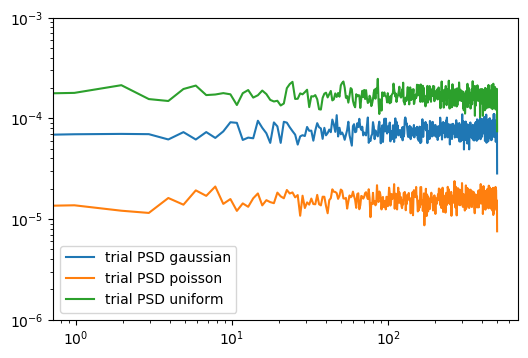

In [12]:
lam = 5.0
C = np.random.poisson(lam, Ntot)

# print(B)

fs = 1000.0
beta = 10.0
window_length = 1024
numoverlap = 880
kaiserw = signal.get_window(('kaiser', beta), window_length) # Kaiser window
boxcarw = signal.boxcar(window_length)



fval, psd = np.absolute(signal.welch((C/lam), fs, nperseg = window_length, window=boxcarw, noverlap = numoverlap))
plt.loglog( fval, psd1/mu**2, label = "trial PSD gaussian" )
plt.loglog( fval, psd/lam**2, label = "trial PSD poisson" )
plt.loglog( fval, psd2, label = "trial PSD uniform" )
plt.ylim(1.0E-6,1.0E-3)
plt.legend()
plt.show()
